# Clustering

In [108]:
import pandas as pd
import numpy as np
import re
import networkx as nx
import matplotlib.pyplot as plt

moviesDf = pd.read_pickle("moviesDf.pkl")
moviesDf


,TitleId,MovieTitle,Actors
0,0000399,Jack and the Beanstalk,[Thomas White]
1,0000430,A Chess Dispute,[Alfred Collins]
2,0000653,A Calamitous Elopement,"[Harry Solter, Linda Arvidson, Charles Inslee,..."
3,0002816,The Drummer of the 8th,"[Cyril Gardner, Mildred Harris, Frank Borzage]"
4,0003662,The Battle of Elderbush Gulch,"[Mae Marsh, Leslie Loveridge, Alfred Paget, Ro..."
...,...,...,...
971,0088249,Terror in the Aisles,"[Donald Pleasence, Nancy Allen, Fred Asparagus..."
972,0088263,Michael Jackson: Thriller,"[Michael Jackson, Ola Ray, Brandon Scott Mille..."
973,0088323,The NeverEnding Story,"[Barret Oliver, Gerald McRaney, Chris Eastman,..."
974,0088381,Nausicaä of the Valley of the Wind,"[Sumi Shimamoto, Mahito Tsujimura, Minoru Yada..."


In [109]:

actor_column = list(moviesDf["Actors"].to_numpy())
G = nx.Graph()

for movie_cast in actor_column[:100]:
    G.add_nodes_from(movie_cast)
    
    if (len(movie_cast) > 1):
        for actor in movie_cast[1:]:
            G.add_edge(movie_cast[0], actor)
    
print(G.nodes())

['Thomas White', 'Alfred Collins', 'Harry Solter', 'Linda Arvidson', 'Charles Inslee', 'George Gebhardt', 'Robert Harron', 'Cyril Gardner', 'Mildred Harris', 'Frank Borzage', 'Mae Marsh', 'Leslie Loveridge', 'Alfred Paget', 'Lillian Gish', 'Charles Hill Mailes', 'Frank Opperman', 'Joseph McDermott', 'Violet MacMillan', 'Fred Woodward', 'Vivian Reed', 'Pierre Couderc', 'Juanita Hansen', 'Jacqueline Lovell', 'Frank Moore', 'Bernadine Zuber', 'Dave Anderson', 'Charles Chaplin', 'Edna Purviance', 'Ben Turpin', 'Peter Sellers', 'Fred Goodwins', 'Jack Henderson', 'Bud Jamison', 'John Rand', 'Billy Armstrong', 'Agnes Ayres', 'Robert Bolder', 'Charles Hitchcock', 'Charlotte Mineau', 'Courtenay Foote', 'Myrtle Stedman', 'Herbert Standing', 'Adele Farrington', 'George Berrell', 'Francesca Bertini', 'Dixie Carr', 'Jane Darwell', 'Marjorie Daw', 'Mabel Normand', 'Alice Davenport', 'Joe Bordeaux', 'Edgar Kennedy', 'Glen Cavender', 'Billy Gilbert', 'Frank Dolan', 'Ted Edwards', 'Keystone Kops', 'Eri

In [104]:
gn = nx.algorithms.community.girvan_newman(G)

communities = tuple(sorted(c) for c in next(gn))
modularity = nx.algorithms.community.modularity(G, communities)

print(communities)



(['Thomas White'], ['Alfred Collins'], ['Agnes Ayres', 'Albert Austin', 'Alfred Paget', 'Ben Turpin', 'Billy Armstrong', 'Bud Jamison', 'Charles Chaplin', 'Charles Hill Mailes', 'Charles Hitchcock', 'Charles Inslee', 'Charlotte Mineau', 'Edna Purviance', 'Eric Campbell', 'Frank Opperman', 'Fred Goodwins', 'George Gebhardt', 'Harry Solter', 'Henry Bergman', 'Jack Henderson', 'Jack Wilson', 'John Rand', 'Joseph McDermott', 'Leo White', 'Leslie Loveridge', 'Lillian Gish', 'Linda Arvidson', 'Lloyd Bacon', 'Loyal Underwood', 'Mae Marsh', 'Peter Sellers', 'Robert Bolder', 'Robert Harron', 'Syd Chaplin', 'Tom Wilson'], ['Bernadine Zuber', 'Cyril Gardner', 'Dave Anderson', 'Frank Borzage', 'Frank Moore', 'Fred Woodward', 'Jacqueline Lovell', 'Juanita Hansen', 'Mildred Harris', 'Pierre Couderc', 'Violet MacMillan', 'Vivian Reed'], ['Adele Farrington', 'Courtenay Foote', 'Dixie Carr', 'Francesca Bertini', 'George Berrell', 'Herbert Standing', 'Jane Darwell', 'Marjorie Daw', 'Myrtle Stedman'], ['

In [110]:

print(f'The modularity is {modularity}')

The modularity is 0.6350652143037497


In [111]:
node_color = []
for node in G.nodes():
    if node in communities[0]:
        node_color.append('blue')
    if node in communities[1]:
        node_color.append('red')
    if node in communities[2]:
        node_color.append('yellow')
    if node in communities[3]:
        node_color.append('orange')
    if node in communities[4]:
        node_color.append('violet')
    if node in communities[5]:
        node_color.append('skyblue')
    if node in communities[6]:
        node_color.append('green')
    if node in communities[7]:
        node_color.append('forestgreen')
    if node in communities[8]:
        node_color.append('darkkhaki')
    if node in communities[9]:
        node_color.append('pink')
    if node in communities[10]:
        node_color.append('deeppink')
    if node in communities[11]:
        node_color.append('teal')
    if node in communities[12]:
        node_color.append('cyan')
    if node in communities[13]:
        node_color.append('coral')
    if node in communities[14]:
        node_color.append('darkmagenta')
    if node in communities[15]:
        node_color.append('darkgoldenrod')
    if node in communities[16]:
        node_color.append('maroon')
    if node in communities[17]:
        node_color.append('gray')
    if node in communities[18]:
        node_color.append('tomato')
    if node in communities[19]:
        node_color.append('lemonchiffon')
    if node in communities[20]:
        node_color.append('thistle')
    if node in communities[21]:
        node_color.append('azure')
    if node in communities[22]:
        node_color.append('crimson')
    if node in communities[23]:
        node_color.append('lawngreen')        

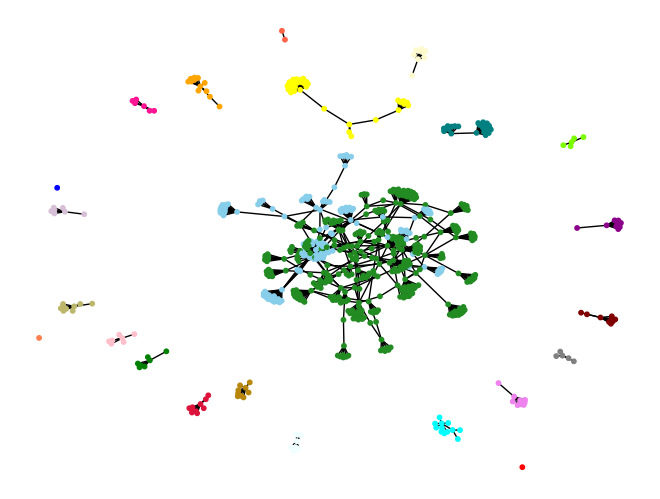

In [107]:
nx.draw(G,node_size=10,node_color=node_color)